# Lab 2: Data Visualizations and Python Functions

## Due Thursday, October 17th at 11:59PM

Welcome to Lab 2! This week, you'll get to practice some DataFrame methods (especially `groupby`), create data visualizations, and learn how to define your very own functions in Python. Creating functions may be new to you, but don't worry, this assignment will guide you through that process! You should complete this entire lab so that all tests pass and submit it to Gradescope by 11:59PM on the due date.

The topics on this lab are covered in [BPD 6](https://notes.dsc10.com/01-getting_started/functions-defining.html), [11](https://notes.dsc10.com/02-data_sets/groupby.html), [12](https://notes.dsc10.com/02-data_sets/apply.html) in the `babypandas` notes and [Chapter 7](https://inferentialthinking.com/chapters/07/Visualization.html) in the CIT textbook.

**Please do not use `for`-loops for any questions in this lab.** If you don't know what a `for`-loop is, don't worry – we haven't covered them yet. But if you do know what they are and are wondering why it's not OK to use them, it is because loops in Python are slow, and looping over arrays and DataFrames should usually be avoided.

First, set up the tests and imports by running the cell below.

In [336]:
import numpy as np
import babypandas as bpd

# These lines set up graphing capabilities.
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

import otter
grader = otter.Notebook()

## 1. Google Play Store Apps 📲

In this section, we will practice DataFrame manipulations and data visualizations, while exploring the [Google Play Store Apps Dataset](https://www.kaggle.com/lava18/google-play-store-apps), scraped from the Google Play Store. 

In [337]:
# Run this cell to load in the dataset
apps = bpd.read_csv('data/googleplaystore.csv')
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10820,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0,Everyone,Education
10821,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0,Everyone,Education
10822,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000.0,Free,0,Everyone,Medical
10823,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0,Mature 17+,Books & Reference


Each row in the DataFrame corresponds to an app. Here are descriptions of some of the columns. 
- `'Category'`: Category the app belongs to.
- `'Rating'`: Overall user rating of the app out of 5 (at the time of data retrieval).
- `'Reviews'`: Number of user reviews for the app (at the time of data retrieval).
- `'Installs'`: Number of user downloads/installs for the app (at the time of data retrieval).
- `'Content Rating'`: Intended audience of the app, such as `'Everyone'` or `'Teen'`.

⚠️ Note that `'Rating'` and `'Content Rating'` mean different things. Don't get them mixed up!

Notice that we did not set the index of the DataFrame, even though it looks like the app name would be a good candidate. But the app names are not unique! We can verify this with the help of the Series method `.unique()`. When called on a Series, this method returns an array of all the distinct values in the Series, without duplicates.

We see above that the DataFrame has 10,825 rows. This means that there are 10,825 apps in the dataset. But let's calculate how many unique app names there are:

In [338]:
len(apps.get('App').unique())

9644

Since $9{,}644 < 10{,}825$, there must be duplicates!

Because there are duplicates, the app name is not a good row label. In fact, there is no good row label in this case. In situations like this, we'll leave the index as-is.

<!-- BEGIN QUESTION -->

**Question 1.1.** You might think that on a 1 to 5 scale, a typical middle-of-the-pack app should have a rating of about 3. 
Make a histogram of the `'Rating'` column to see if that's the case.

<!--
BEGIN QUESTION
name: q1_1
manual: true
-->

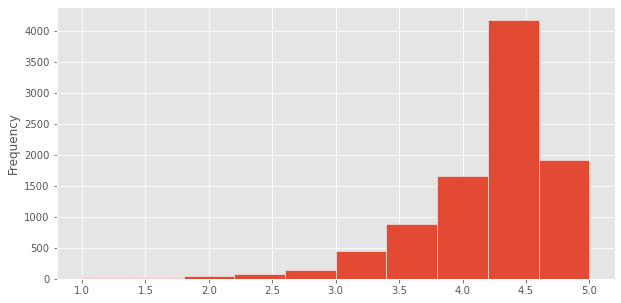

In [339]:
# Create your histogram here.
apps.get("Rating").plot(kind="hist", y="Rating", ec='w');

<!-- END QUESTION -->



There certainly seems to be a lot of excellent apps out there! It would be interesting to see whether the apps with higher ratings also have more reviews. 

**Question 1.2.** What type of plot would you want to create to help you determine whether higher-rated apps also have more reviews? Assign either 1, 2, 3, or 4 to the name `plot_type` below.

1. scatter plot
2. line graph
3. bar graph
4. histogram

In [340]:
plot_type = 1 #why scatter plot? I'm not sure

In [341]:
grader.check("q1_2")

q1_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.3.** Now create the plot you identified above to help you determine whether higher-rated apps also have more reviews.

<!--
BEGIN QUESTION
name: q1_3
manual: true
-->

# Scatterplots are introduced in lecture 6

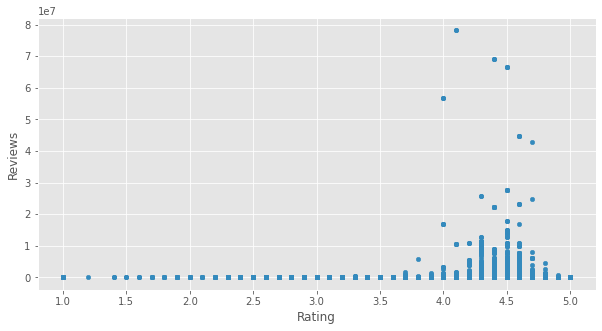

In [342]:
# Create your plot here.
apps.plot(kind = 'scatter',x='Rating', y='Reviews');

<!-- END QUESTION -->



**Question 1.4.** Which of the following can we conclude, based on this data? Assign either 1, 2, 3, or 4 to the name `plot_conclusion` below.

1. Apps with higher ratings become more popular, and since more people are using these apps, more reviews are given.
2. Apps with more reviews become more popular, and since more people are using these apps, higher ratings are given.
3. Both 1 and 2.
4. Neither 1 nor 2.

In [343]:
plot_conclusion = 4

In [344]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** Assign the name `by_content` to a DataFrame which counts the number of apps per `'Content Rating'`, indexed by `'Content Rating'`.

***Hint:*** To keep only certain columns in a DataFrame, call `.get` with a list of the names of the columns you want to keep. 

In [345]:
by_content = apps.groupby('Content Rating').count().get(['App'])
by_content

,App
Content Rating,
Adults only 18+,3
Everyone,8702
Everyone 10+,413
Mature 17+,499
Teen,1206
Unrated,2


In [346]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6.** Create a DataFrame called `install_stats` which has a single column, `'Installs'`, that contains the mean number of `'Installs'` for each type of `'Content Rating'`. It's okay if the answers display in scientific notation.

### ***Hint:*** The groupby method changes the index to your groupby column. As in the last question, you'll need to use `.get` with a list of the names of the columns you want to keep. 

In [347]:
install_stats = apps.groupby(['Content Rating']).mean().get(['Installs'])
install_stats

,Installs
Content Rating,
Adults only 18+,6.666667e+05
Everyone,1.311844e+07
Everyone 10+,3.204330e+07
Mature 17+,1.107112e+07
Teen,2.878636e+07
Unrated,2.525000e+04


In [348]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 1.7.** Create a DataFrame called `top_social_apps_by_content_rating` that contains one row for each unique `'Content Rating'` that has apps satisfying both of these conditions:
- `'Category'` is `'SOCIAL'`. 
- `'Rating'` is between 4 and 5 (inclusive).

The structure of `top_social_apps_by_content_rating` should be as follows:
- It should have just one column, `'Num_Top_Social_Apps'`, with the number of apps of that `'Content Rating'` satisfying both conditions.
- The rows should be sorted in decreasing order of `'Num_Top_Social_Apps'`.

***Hint:*** You can do this however you'd like, but what we did was:
1. Create a single DataFrame that contains only the rows of `apps` matching both specified conditions.
2. Call `groupby` on the DataFrame that resulted from step 1.
3. Use `.assign` and `.drop` to rename the `'App'` column to `'Num_Top_Social_Apps'`.
4. Sort the rows as required.

This is a hard question - take it one step at a time, and display all your intermediate results!

In [349]:
top_social_apps_by_content_rating = apps[(apps.get('Rating')>= 4) & (apps.get('Category')=='SOCIAL')]
top_social_apps_by_content_rating = top_social_apps_by_content_rating.groupby('Content Rating').count()
top_social_apps_by_content_rating = top_social_apps_by_content_rating.assign(Num_Top_Social_Apps = top_social_apps_by_content_rating.get('App'))
top_social_apps_by_content_rating = (
    top_social_apps_by_content_rating
    .get(['Num_Top_Social_Apps'])
    .sort_values(by='Num_Top_Social_Apps', ascending=False)
)
top_social_apps_by_content_rating

,Num_Top_Social_Apps
Content Rating,
Teen,92
Everyone,76
Mature 17+,54
Everyone 10+,2


In [350]:
grader.check("q1_7")

q1_7 results: All test cases passed!

**Question 1.8.** Suppose a good app is one with at least one million installs and a rating of at least 4.0. Create a variable called `best_category` containing the name of the category with the most good apps.

***Note:*** Your answer should be generated using code – not by hard-coding a string! (In other words, don't write `best_category = 'DATING'` if you think that's the best category).

In [351]:
# apps[(apps.get('Rating') >= 4) & (apps.get('Installs') >= 1_000_000)].groupby("Category").count().sort_values(by= 'App', ascending = False)
best_category = (
    apps[(apps.get('Rating') >= 4) & (apps.get('Installs') >= 1_000_000)]
    .groupby("Category")
    .count()
    .sort_values(by= 'App', ascending = False)
)

best_category = best_category.index[0] 

In [352]:
grader.check("q1_8")

q1_8 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_9
manual: true
-->

**Question 1.9.** Make a vertical bar chart of the average rating by category in which the bars are sorted from smallest to largest. Your result should look like this:

<img src='data/barchart.jpg' width=50%/>

<font color=red>**🚨 If your visualization for this question, or any other question, is too cluttered to read or takes more than a few seconds to generate, this is a sign you are doing something wrong. Do not submit code like this, or the Gradescope autograder may fail to grade your entire assignment. It's better to leave a question blank than to submit code that will cause the autograder to fail on your full assignment.**</font>

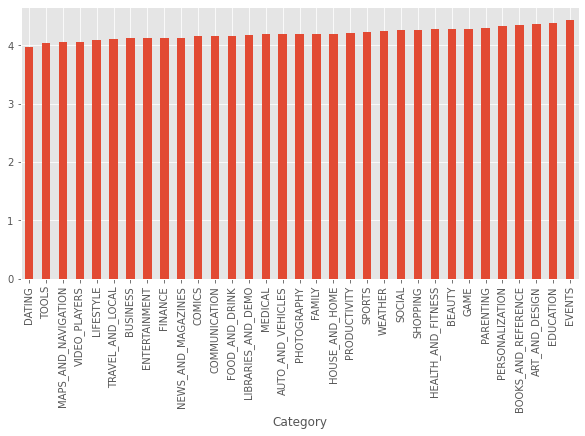

In [353]:
# Create your vertical bar chart here.
# Make a vertical bar chart of the average rating by
# category in which the bars are sorted from smallest to largest. 
avg_rating = apps.groupby(['Category']).mean().sort_values(by = "Rating")
avg_rating.plot(kind= 'bar', y = 'Rating', legend = False);

<!-- END QUESTION -->



## 2. Fortune 500 Companies 💯💯💯💯💯

For the rest of this lab, we'll look at the 2022 revenue of the 500 highest-earning companies in the United States. The data was compiled for the 2023 edition of Fortune magazine's [Fortune 500 list](https://fortune.com/ranking/global500/2023/search/), which ranks the 500 largest corporations in the United States by their total revenue in the year 2022. See Fortune's [methodology page](https://fortune.com/franchise-list-page/fortune-500-methodology-2023/) for more details.

We've copied the data from the Fortune magazine page into a file called `raw_fortune_500.csv`.  Note that all dollar amounts are in billions of dollars.

In [354]:
raw_fortune_500 = bpd.read_csv('data/raw_fortune_500.csv').set_index('Rank')
raw_fortune_500

,Name,Industry,Sector,Headquarters,Revenue,% Change,Profit,Asset,Market Value,Employees
Rank,,,,,,,,,,
1,Walmart,General Merchandisers,Retailing,"Bentonville, AR",$611.29,7%,$11.68,$243.20,$397.48,2100000
2,Amazon,Internet Services and Retailing,Retailing,"Seattle, WA",$513.98,9%,$2.72,$462.68,$1058.44,1541000
3,Exxon Mobil,Petroleum Refining,Energy,"Irving, TX",$413.68,45%,$55.74,$369.07,$446.42,62000
4,Apple,"Computers, Office Equipment",Technology,"Cupertino, CA",$394.33,8%,$99.80,$352.76,$2609.04,164000
5,UnitedHealth Group,Health Care: Insurance and Managed Care,Health Care,"Minnetonka, MN",$324.16,13%,$20.12,$245.70,$440.85,400000
...,...,...,...,...,...,...,...,...,...,...
496,KKR,Securities,Financials,"New York, NY",$7.27,-72%,$0.84,$277.08,$45.22,4150
497,Equinix,Real Estate,Financials,"Redwood City, CA",$7.26,9%,$0.70,$30.31,$66.87,12097
498,Sonoco Products,"Packaging, Containers",Materials,"Hartsville, SC",$7.25,(No previous year),$0.47,$7.05,$5.98,22000


We want to compute the average of the companies' revenues. Try running the cell below. 🚨 When you're done, make sure to comment it out.

In [355]:
# After running this cell to see the error, please prevent it from running again
# by placing a '#' in front of the line of code to 'comment it out'.
# avg_revenue=(raw_fortune_500.get('Revenue').apply(convert_revenue_string_to_number).mean())/1e9

You should see an error. Let's examine why this error occured by looking at the values in the `'Revenue'` column. 

**Question 2.1.** Use the `type` function to set `revenue_type` to the type of the first item from the `'Revenue'` column.

In [356]:
revenue_type = type(raw_fortune_500.get('Revenue').iloc[0])
revenue_type

str

In [357]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** You should have found that the values in the `'Revenue'` column are stored as strings (text). It doesn't make sense to take the average of text values, so we need to convert them to numbers if we want to do this. Extract the first value in the `'Revenue'` column.  It's the 2022 revenue of Walmart, the highest-earning company in 2022, in *billions* of dollars. Call it `walmart_revenue_string`.

In [358]:
walmart_revenue_string = raw_fortune_500.get('Revenue').iloc[0]
walmart_revenue_string

'$611.29'

In [359]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Using code, convert `walmart_revenue_string` to a number of *dollars* as a float and store the result in the variable `walmart_revenue`.  
- The string method `strip` will be useful for removing the dollar sign; it removes a specified character from the start or end of a string.  For example, the value of `'100%'.strip('%')` is the string `'100'`.  
- You'll also need the function `float`, which converts a string that looks like a number to an actual number.  
- Last, remember that the answer should be in dollars, not billions of dollars.

In [360]:
walmart_revenue = float(walmart_revenue_string.strip('$'))*1e9
walmart_revenue

611290000000.0

In [361]:
grader.check("q2_3")

q2_3 results: All test cases passed!

To compute the average revenue, we need to do this for every company.  But that looks like it would involve copying this code 500 times. No, thanks! 🙅

This is where functions come in.  Suppose instead of `walmart_revenue_string`, we had a variable called `some_revenue_string`, formatted in the same way as `walmart_revenue_string` is, with a dollar sign followed by an amount. Now that we've done it for `walmart_revenue_string`, we could use essentially the same code on `some_revenue_string` to extract the revenue as a number of dollars. You'd just need to change `walmart_revenue_string` in your code to `some_revenue_string`.

**Question 2.4.** Inside the function below, type the word `return` (which should turn green), then copy the expression you used to compute `walmart_revenue`, but replace the specific `walmart_revenue_string` with the generic `some_revenue_string`.

In [362]:
def convert_revenue_string_to_number(some_revenue_string):
    """Converts a revenue string like '$100' (in billions) to a number of dollars."""
    # After the word return, put your code to convert some_revenue_string to a number of dollars.
    revenue_int = 0
    revenue_int = float(some_revenue_string.strip("$"))*1e9
    return revenue_int
convert_revenue_string_to_number('$500')

500000000000.0

In [363]:
grader.check("q2_4")

q2_4 results: All test cases passed!

Here, we've defined a new function, giving a name to the expression that converts `'Revenue'` strings to numeric values. This function can convert any string with the right format representing billions of dollars (like `'$100 '`) to a number in dollars. Later in this lab we'll see the payoff – we can call (use) that function on every revenue string in the dataset at once.

We can call our function just like we call the built-in functions we've seen. It takes one argument, a string, and it returns a number.

In [364]:
convert_revenue_string_to_number('$42')

42000000000.0

In [365]:
convert_revenue_string_to_number(walmart_revenue_string)

611290000000.0

In [366]:
# We can also compute Amazon's revenue in the same way:
convert_revenue_string_to_number(raw_fortune_500.get('Revenue').iloc[1])

513980000000.0

What have we gained?  Well, without the function, we'd have to copy that the code to strip the dollar sign, convert to afloat, and multiply by one billion **every time** we wanted to convert a revenue string.  Now we just call a function whose name says exactly what it's doing.

Soon, we'll see how to apply this function to every revenue string with a single expression. First, let's take a closer look at how to create our own functions.

## 3. Defining Functions ➗

Let's create a very simple function that converts a proportion to a percentage by multiplying it by 100.  For example, the value of `to_percentage(0.5)` should be the number 50.  (No percent sign.)

A function definition has a few parts.

##### `def`
It always starts with `def` (short for **def**ine):

```py
def
```

##### Name
Next comes the name of the function.  Let's call our function `to_percentage`.

```py
def to_percentage
```

##### Signature
Next comes something called the *signature* of the function.  This tells Python how many *arguments* your function should have, and what names you'll use to refer to those arguments in the function's code.  `to_percentage` should take one argument, and we'll call that argument `proportion` since it should be a proportion.

```py
def to_percentage(proportion)
```

We put a colon after the signature to tell Python it's over.

```py
def to_percentage(proportion):
```

##### Documentation
Functions can do complicated things, so **you should write an explanation of what your function does**.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing a triple-quoted string:

```py
def to_percentage(proportion):
    """Converts a proportion to a percentage."""
```
    
    
##### Body
Now we start writing code that runs when the function is called.  This is called the *body* of the function.  We can write anything we could write anywhere else.  First let's give a name to the number we multiply a proportion by to get a percentage.

```py
def to_percentage(proportion):
    """Converts a proportion to a percentage."""
    factor = 100
```

##### `return`
The special instruction `return` in a function's body tells Python to make the value of the function call equal to whatever comes right after `return`. The return statement also *ends the function* and once it's called *no lines in the body after it are run*. Since we want the value of `to_percentage(0.5)` to be the proportion 0.5 times the factor 100, we write:

```py
def to_percentage(proportion):
    """Converts a proportion to a percentage."""
    factor = 100
    return proportion * factor
```

**Question 3.1.** Define the function `to_percentage` in the cell below.  Call your function to convert the proportion `0.2` to a percentage.  Name that percentage `twenty_percent`.

In [367]:
def to_percentage(proportion):
    """ Converts a proportion to a percentage """
    percentage = ""
    percentage = proportion*100
    return percentage
to_percentage(.50)

50.0

In [368]:
grader.check("q3_1_1")

q3_1_1 results: All test cases passed!

In [369]:
twenty_percent = to_percentage(.20)
twenty_percent

20.0

In [370]:
grader.check("q3_1_2")

q3_1_2 results: All test cases passed!

As with built-in functions (like `max` and `abs`), you can pass in variable names as arguments to functions you define yourself.

**Question 3.2.** Use `to_percentage` again to convert the proportion named `a_proportion` (defined below) to a percentage called `a_percentage`.

***Note:*** You don't need to define `to_percentage` again!  Just like other named things, functions stick around after you define them.

In [371]:
a_proportion = (2 ** 0.5) / 2

In [372]:
a_percentage = to_percentage(a_proportion)
a_percentage

70.71067811865476

In [373]:
grader.check("q3_2")

q3_2 results: All test cases passed!

Here's an important fact about functions: the variable names assigned within a function's body are only accessible within that function's body. Once the function has returned, those names are gone. So even though you defined `factor = 100` inside `to_percentage` above and then called `to_percentage`, the variable name `factor` has no meaning outside the body of `to_percentage`.

To show you what we mean, run the following cell. **It intentionally causes an error**. 🚨 When you're done, comment it out.

In [374]:
# You should see an error when you run this.  (If you don't, you might
# have defined factor somewhere above.) Comment this code out
# after running it to prevent the error in the future.

# factor

If we wanted to, we could define a new variable with the name `factor` outside of the definition of `to_percentage`, and it could have any value we want.

As we've seen with the built-in functions, functions can also take strings (or arrays, or DataFrames) as arguments, and they can return those things, too.

**Question 3.3.** Define a function called `disemvowel`.  It should take a single string as its argument. It should return a copy of that string, but with all the characters that are vowels removed. You can assume that `disemvowel` will only be called on lowercase strings, meaning that you only have to get rid of lowercase vowels. (In English, the vowels are the characters 'a', 'e', 'i', 'o', and 'u'. We won't count 'y'.)

***Hints:*** 
- To remove all the `'a'`s from a string, you can use `that_string.replace('a', '')`. 
- You can call `replace` multiple times on a single string, e.g. `'hey'.replace('e', 'o').replace('y', 'w')` is valid code.
- Use the same strategy we used when writing the function `convert_revenue_string_to_number`: start by writing code that does the desired operation on a particular example (like `walmart_revenue_string`). Once that's working, generalize your code to work for an arbitrary example, and then put it inside a function. Feel free to add additional cells as needed.

In [375]:
# def vowel_strip(test_string):
#     vowel_array = np.array(['a','e','i','o','u'])
# #     test_string = "ihopethisrunsplease"
#     new_string = ""
#     for i in np.arange(len(test_string)):
#         if test_string[i] in vowel_array:
#             i += 1
#         else: #(test_string[i] not in vowel_array):
#             new_string += test_string[i]
#     return new_string
# vowel_strip("ooogaabooga wooga")

In [376]:
def disemvowel(a_string):
#     nonvowel_array = np.array(['a','e','i','o','u'])
#     nonvowel =  for i 
    vowel_array = np.array(['a','e','i','o','u'])
    new_string = ""
    for i in np.arange(len(a_string)):
        if a_string[i] in vowel_array:
            i += 1
        else: #(test_string[i] not in vowel_array):
            new_string += a_string[i]
    return new_string
    
# An example call to your function. Make sure to try out other examples too, 
# to make sure your function works as intended. Feel free to change the line below.
disemvowel('can you read this without vowels?')

'cn y rd ths wtht vwls?'

In [377]:
grader.check("q3_3")

q3_3 results: All test cases passed!

##### Calls on calls on calls
Just as you write a series of lines to build up a complex computation, it's useful to define a series of small functions that build on each other.  Since you can write any code inside a function's body, you can call other functions you've written.

If a function is a like a recipe, defining a function in terms of other functions is like having a recipe for cake 🍰 telling you to follow another recipe to make the frosting, and another to make the filling.  This makes the cake recipe shorter and clearer, and it avoids having a bunch of duplicated frosting recipes.  It's a foundation of productive programming.

For example, suppose you want to count the number of characters *that aren't vowels* in a piece of text.  One way to do that is this to remove all the vowels and count the size of the remaining string.

**Question 3.4.** Write a function called `num_non_vowels`.  It should take a string as its argument and return a number.  The number should be the number of characters in the argument string that aren't vowels. Again, you can assume that `num_non_vowels` will only be called on lowercase strings.

***Hint:*** The function `len` takes a string as its argument and returns the number of characters in it.

In [378]:
def num_non_vowels(b_string):
    """The number of characters in a string, not counting any vowels."""
    num_non = 0
    num_non = len(disemvowel(b_string))
    return num_non

In [379]:
grader.check("q3_4")

q3_4 results: All test cases passed!

Functions can also encapsulate code that *does things* rather than just computing values.  For example, if you call `print` inside a function, and then call that function, something will be printed.

Let's make use of a dataset of the top 500 all-time most streamed songs on Spotify, which we have loaded into the variable `spotify_streams` below. Note that the songs are sorted alphabetically by title.

In [380]:
spotify_streams = bpd.read_csv('data/spotify_streams.csv').set_index('Song')
spotify_streams

,Artist,Streams (Billions)
Song,,
1-800-273-8255,Logic,1.352988
2002,Anne-Marie,1.573897
24K Magic,Bruno Mars,1.500159
505,Arctic Monkeys,1.808410
7 Years,Lukas Graham,2.004016
...,...,...
telepatía,Kali Uchis,1.229562
"thank u, next",Ariana Grande,1.922892
traitor,Olivia Rodrigo,1.667873


Suppose you'd like to display the name of the song with the 5th most streams, printed in a human-readable way. You might do this:

In [381]:
rank = 5
fifth_most_streamed_song = spotify_streams.sort_values(by='Streams (Billions)', ascending=False).index[rank-1]

print('The song ranked number', rank, 'for most all-time Spotify streams is', fifth_most_streamed_song)

The song ranked number 5 for most all-time Spotify streams is Sunflower


After writing this, you realize you also wanted to print out the 2nd and 3rd-most streamed songs.  Instead of copying your code, you decide to put it in a function.  Since the rank varies, you make that an argument to your function.

**Question 3.5.** Write a function called `print_kth_most_streamed_song`.  It should take a single argument, the rank of the song's number of streams (like 2, 3, or 5 in the above examples).  It should print out a message like the one above.  It shouldn't have a `return` statement, because we want the function to print, not return.

In [382]:
def print_kth_most_streamed_song(k):
    print(spotify_streams.sort_values(by='Streams (Billions)', ascending=False).index[k-1])

In [383]:
# Example calls to your function:
print_kth_most_streamed_song(2)
print_kth_most_streamed_song(3)

Shape of You
Someone You Loved


## 4. Applying Functions 🩹

Defining a function is a lot like giving a name to a value with `=`.  In fact, a function is a value just like the number 1 or the string `'hey'`!

For example, we can make a new name for the built-in function `max` if we want:

In [384]:
the_largest_of = max
the_largest_of(10, 11)

11

The old name for `max` is still around:

In [385]:
max(10, 11)

11

Try just writing `max` or `the_largest_of` (or the name of any other function) in a cell, and run that cell.  Python will print out a (very brief) description of the function.

In [386]:
print_kth_most_streamed_song

<function __main__.print_kth_most_streamed_song(k)>

Why is this useful?  Since functions are just values, it's possible to pass them as arguments to other functions.  Here's a simple but not-so-practical example: we can make an array of functions.

In [387]:
np.array([max, np.average, type])

array([<built-in function max>, <function average at 0x7f00205dee50>,
       <class 'type'>], dtype=object)

**Question 4.1.** Make an array containing any 3 other functions you've seen.  Call it `some_functions`. Do not import any packages.

In [388]:
some_functions = np.array([max, min, print])
some_functions

array([<built-in function max>, <built-in function min>,
       <built-in function print>], dtype=object)

In [389]:
grader.check("q4_1")

q4_1 results: All test cases passed!

Working with functions as values can lead to some funny-looking code.  For example, see if you can figure out how this line of code works:

In [390]:
np.array([max, np.average, type])[0](4, -2, 7)

7

Here's a simpler example that's actually useful: the Series method `apply`.
`apply` calls a function many times, once on *each* element of a Series, which typically comes from a column of a DataFrame. It produces a Series of the results, which we may want to then add to a DataFrame.

Here's an example. Remember that the `'Revenue'` column of the `fortune_500` DataFrame contained strings:

In [391]:
raw_fortune_500.get('Revenue')

Rank
1      $611.29
2      $513.98
3      $413.68
4      $394.33
5      $324.16
        ...   
496      $7.27
497      $7.26
498      $7.25
499      $7.24
500      $7.24
Name: Revenue, Length: 500, dtype: object

We wrote a function, `convert_revenue_string_to_number`, that converts one of these strings to a number.
Here we use `apply` to convert every company's revenue to a number, using the function you defined:

Here's an illustration of what that did:

<img src="data/apply-review.jpg" width=700/>

Note that we didn't write something like `convert_revenue_string_to_number()` or `convert_revenue_string_to_number('Revenue')`.  The job of `apply` is to call the function we give it, so instead of calling `convert_revenue_string_to_number` ourselves, we just write its name as an argument to `apply`.

**Question 4.2.** Using `apply`, make a DataFrame that's a copy of `raw_fortune_500` with one additional column called `'Revenue_Dollars'`.  It should be the result of applying `convert_revenue_string_to_number` to the `'Revenue'` column, as we did above.  Call the new DataFrame `fortune_500`. Since the revenue of these companies in dollars is so large, the `'Revenue_Dollars'` column will display in scientific notation.

In [392]:
fortune_500 = raw_fortune_500.assign(Revenue_Dollars = raw_fortune_500.get('Revenue').apply(convert_revenue_string_to_number))
fortune_500

,Name,Industry,Sector,Headquarters,Revenue,% Change,Profit,Asset,Market Value,Employees,Revenue_Dollars
Rank,,,,,,,,,,,
1,Walmart,General Merchandisers,Retailing,"Bentonville, AR",$611.29,7%,$11.68,$243.20,$397.48,2100000,6.112900e+11
2,Amazon,Internet Services and Retailing,Retailing,"Seattle, WA",$513.98,9%,$2.72,$462.68,$1058.44,1541000,5.139800e+11
3,Exxon Mobil,Petroleum Refining,Energy,"Irving, TX",$413.68,45%,$55.74,$369.07,$446.42,62000,4.136800e+11
4,Apple,"Computers, Office Equipment",Technology,"Cupertino, CA",$394.33,8%,$99.80,$352.76,$2609.04,164000,3.943300e+11
5,UnitedHealth Group,Health Care: Insurance and Managed Care,Health Care,"Minnetonka, MN",$324.16,13%,$20.12,$245.70,$440.85,400000,3.241600e+11
...,...,...,...,...,...,...,...,...,...,...,...
496,KKR,Securities,Financials,"New York, NY",$7.27,-72%,$0.84,$277.08,$45.22,4150,7.270000e+09
497,Equinix,Real Estate,Financials,"Redwood City, CA",$7.26,9%,$0.70,$30.31,$66.87,12097,7.260000e+09
498,Sonoco Products,"Packaging, Containers",Materials,"Hartsville, SC",$7.25,(No previous year),$0.47,$7.05,$5.98,22000,7.250000e+09


In [393]:
grader.check("q4_2")

q4_2 results: All test cases passed!

Now that we have the revenues as floats instead of strings, we can perform arithmetic operations (and, as a result, compute numerical summaries) on the revenue values.

**Question 4.3.** Compute the average revenue of the companies in the dataset, in dollars.

In [394]:
average_revenue = (raw_fortune_500.get('Revenue').apply(convert_revenue_string_to_number).mean())
average_revenue

36288520000.0

In [395]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** Although Walmart has the highest revenue in `fortune_500`, we can see that some other companies such as Apple have higher profit. This is because profit takes into account expenses such as operating costs and debts, whereas revenue does not take expenses into account. Compute the proportion of each company's revenue that ended up as profit. (Your answer should be a Series.)

In [396]:
# fortune_500.get('Revenue').apply(convert_revenue_string_to_number)/fortune_500.get('Profit').apply(convert_revenue_string_to_number)

In [397]:
profit_proportion = (
    fortune_500.get('Profit').apply(convert_revenue_string_to_number)/fortune_500.get('Revenue').apply(convert_revenue_string_to_number)    
)
fortune_500 = fortune_500
profit_proportion

Rank
1      0.019107
2      0.005292
3      0.134742
4      0.253088
5      0.062068
         ...   
496    0.115543
497    0.096419
498    0.064828
499    0.044199
500    0.091160
Length: 500, dtype: float64

In [398]:
grader.check("q4_4")

q4_4 results: All test cases passed!

Alright, back to our companies.  Check out the `'% Change'` column in `fortune_500`.  It shows the percentage increase in the company's revenue from the previous year.  For companies that were not part of the Fortune 500 in the previous year, it instead says `'(No previous year)'`.  The values in this column are *strings*, not numbers, so they are not usable without a bit of extra work.

Given your current revenue and the percentage increase from the previous year, you can compute your previous year's revenue. This year's revenue and last year's revenue are related by the formula:

$$\text{this year's revenue} = \text{last year's revenue} \cdot \left(1+\dfrac{\text{percent increase}}{100}\right)$$

For example, if your company made \$600,000 last year and your revenue increased by 50\%, then 

$$\begin{align}
\text{this year's revenue} &= \text{600000} \cdot \left(1+\dfrac{\text{50}}{100}\right)\\
&= \text{600000} \cdot (1.5) \\
&= 900000
\end{align}$$

Since we know how this year's revenue and last year's revenue are mathematically related, we can solve this equation for last year's revenue to give a formula for the previous year's revenue if we know the current year's revenue and the percent increase from the previous year to the current year. Doing some algebra, we find:

$$\text{last year's revenue} = \dfrac{\text{this year's revenue}}{\left(1+\dfrac{\text{percent increase}}{100}\right)}$$

**Question 4.5.** Create a new DataFrame called `with_previous_fortune_500`.  It should be a copy of `fortune_500`, but with the `'(No previous year)'` companies filtered out, and with an extra column called `'Previous_Revenue'`.  That column should have each company's revenue in 2021 (because remember, the values in the `'Revenue'` column contain 2022 revenues).

***Hints:***
- This question takes several steps, but each one involves something you've already learned how to do.  Take it one step at a time, using as many lines as you need.  You can print out your results after each step to make sure you're on the right track.
- You'll need to define a function to convert percentage strings, like `'-15%'`, to numbers.  You can do that just above your other code.
- If you see an error saying `unsupported operand type(s) for +: 'int' and 'Series'`, try switching the order of your operation. Instead of writing something like `1 + series`, write `series + 1`.

***Note:*** Don't use the `~` symbol anywhere inside your code, or the Gradescope autograder may not be able to grade your work.

In [399]:
# You can write code to perform intermediate steps here!
def convert_perc_string(a_string):
    '''Converts a string % Change to a number'''
    new_float = ""
    new_float = float(a_string.replace('%', ''))/100.00
    return new_float

def convert_money_string(b_string):
    '''Converts string of revenue to a number. NOTE:REVENUE HAS TO BE IN MILLIONS'''
    new_float = ""
    new_float = float(b_string.strip('$'))
    new_float = new_float*1e9 #MILLIONS!
    return new_float

with_previous_fortune_500 = fortune_500[fortune_500.get('% Change') != '(No previous year)']
prev_rev_series = (with_previous_fortune_500
     .get("Revenue")
     .apply(convert_money_string)) / (with_previous_fortune_500.get("% Change").apply(convert_perc_string)+1)

with_previous_fortune_500 = with_previous_fortune_500.assign(Previous_Revenue = prev_rev_series)
with_previous_fortune_500


,Name,Industry,Sector,Headquarters,Revenue,% Change,Profit,Asset,Market Value,Employees,Revenue_Dollars,Previous_Revenue
Rank,,,,,,,,,,,,
1,Walmart,General Merchandisers,Retailing,"Bentonville, AR",$611.29,7%,$11.68,$243.20,$397.48,2100000,6.112900e+11,5.712991e+11
2,Amazon,Internet Services and Retailing,Retailing,"Seattle, WA",$513.98,9%,$2.72,$462.68,$1058.44,1541000,5.139800e+11,4.715413e+11
3,Exxon Mobil,Petroleum Refining,Energy,"Irving, TX",$413.68,45%,$55.74,$369.07,$446.42,62000,4.136800e+11,2.852966e+11
4,Apple,"Computers, Office Equipment",Technology,"Cupertino, CA",$394.33,8%,$99.80,$352.76,$2609.04,164000,3.943300e+11,3.651204e+11
5,UnitedHealth Group,Health Care: Insurance and Managed Care,Health Care,"Minnetonka, MN",$324.16,13%,$20.12,$245.70,$440.85,400000,3.241600e+11,2.868673e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
486,Genworth Financial,"Insurance: Life, Health (Stock)",Financials,"Richmond, VA",$7.51,-5%,$0.61,$86.44,$2.48,2500,7.510000e+09,7.905263e+09
489,Landstar System,"Trucking, Truck Leasing",Transportation,"Jacksonville, FL",$7.44,14%,$0.43,$1.93,$6.46,1449,7.440000e+09,6.526316e+09
496,KKR,Securities,Financials,"New York, NY",$7.27,-72%,$0.84,$277.08,$45.22,4150,7.270000e+09,2.596429e+10


In [400]:
grader.check("q4_5")

q4_5 results: All test cases passed!

**Question 4.6.** What was the average revenue of these companies in 2021?

In [409]:
average_revenue_2021 = with_previous_fortune_500.get('Previous_Revenue').mean()
average_revenue_2021

33639790366.980835

In [410]:
grader.check("q4_6")

q4_6 results: All test cases passed!

## 5. Distribution of Revenue 💰
Earlier, we computed the average revenue among the companies in our 500-company dataset.  The average doesn't tell us everything about the amounts companies earn, though.  Maybe just a few companies make the bulk of the money, even among these 500.

We can use a *density histogram* to display more information about a set of numbers.  [Here's an example](https://dsc10.com/resources/lectures/lec07/lec07.html#Plotting-a-density-histogram) of the code that we use to create histograms. 

**Question 5.1.** Make a density histogram of the revenue of the companies in `fortune_500`. Use bins starting from 0 with a width of `0.5*10**11`.

***Hint:*** To determine the scale of your x-axis, look at the largest revenue in the dataset and make sure that it is included in the rightmost bin.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q5_1
manual: true
-->

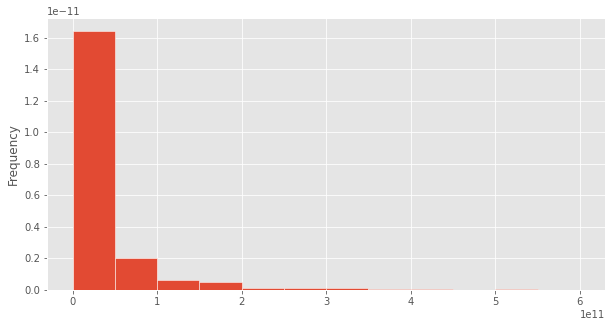

In [434]:
# Create your histogram here.
with_previous_fortune_500.get("Revenue_Dollars").plot(kind='hist',density=True, bins = np.arange(0, 6.12e11, 0.5*1e11), ec='w');
# (with_previous_fortune_500.get("Revenue_Dollars").max())/1e11

<!-- END QUESTION -->



**Question 5.2.** Looking at the histogram, about how many companies made more than \$100 billion in revenue? Make a good guess. (Answer the question by filling in your answer manually.  You'll have to do a bit of arithmetic; feel free to use Python as a calculator.)

In [452]:
num_companies_more_than_100_billion = (2*.05)+(3*0.01)*500
num_companies_more_than_100_billion = round(num_companies_more_than_100_billion)
num_companies_more_than_100_billion

15

In [453]:
grader.check("q5_2")

q5_2 results: All test cases passed!

**Question 5.3.** Answer the same question with code. That is, find the number of companies with a revenue of over \$100 billion using code, and assign the result to the name `num_companies_more_than_100_billion_code`.

In [458]:
num_companies_more_than_100_billion_code = with_previous_fortune_500[with_previous_fortune_500.get('Revenue_Dollars') > 1e11].shape[0]
num_companies_more_than_100_billion_code

38

In [459]:
grader.check("q5_3")

q5_3 results: All test cases passed!

Run the next cell if you want to see how far off you were.

In [460]:
percent_diff = abs(num_companies_more_than_100_billion - num_companies_more_than_100_billion_code) / num_companies_more_than_100_billion_code
print(f'Your guess was only {percent_diff * 100}% off!')

Your guess was only 60.526315789473685% off!


# Finish Line 🏁

Congratulations! You are done with Lab 2.

**Citations:** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
5. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
6. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
grader.check_all()